# Курс «Теория вероятностей и статистика в Машинном Обучении» 
# Лабораторная работа №1: Описательная статистика, визуализация, предварительная обработка данных 


Часть 1
1.	Найти на сайте РосСтат https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/index.html данные, распределение которых было бы близко к
a) нормальному (визуально выглядит как кривая Гаусса - «колокол»),
б) равномерному.
2.	 Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.
3.	Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).


# Импорт библиотек

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import scipy

# Нормальное распределение с несмещенной медианой
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [89]:
# Загрузка датасета
data = pd.read_csv("../Data/SOCR-HeightWeight.csv")
print(data.head()) 

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [90]:
print(data.isnull().sum())  # Подсчет пропущенных значений

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64


In [124]:
print(data.describe())  # Статистические характеристики
mean = data["Height(Inches)"].mean()
median = data['Height(Inches)'].median()
mode = data['Height(Inches)'].mode()[0]
skew = data['Height(Inches)'].skew()
print(f'Height(Inches) : Median: {median}, Mode: {mode}, Mean: {mean}, Skew: {skew}')

              Index  Height(Inches)  Weight(Pounds)
count  25000.000000    25000.000000    25000.000000
mean   12500.500000       67.993114      127.079421
std     7217.022701        1.901679       11.660898
min        1.000000       60.278360       78.014760
25%     6250.750000       66.704397      119.308675
50%    12500.500000       67.995700      127.157750
75%    18750.250000       69.272958      134.892850
max    25000.000000       75.152800      170.924000
Height(Inches) : Median: 67.9957, Mode: 65.65796, Mean: 67.99311359679999, Skew: -0.00565797936693913


In [92]:
sns.set(style='whitegrid')

In [93]:
# Параметры для построения графика
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Height(Inches)', ylabel='Density'>

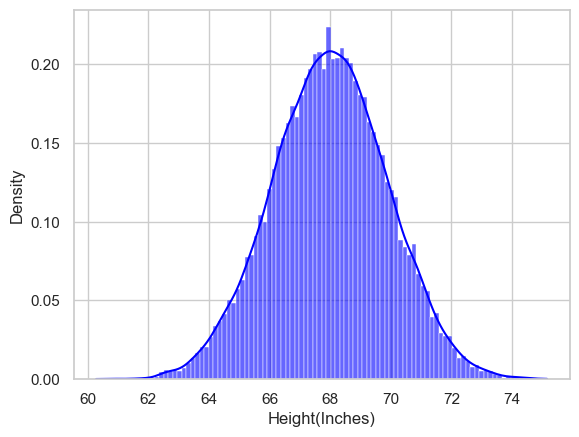

In [101]:
# Строим гистограмму для Bmi
sns.histplot(data['Height(Inches)'], bins=100, kde=True, stat='density', color='blue', alpha=0.6)

<Axes: xlabel='Weight(Pounds)', ylabel='Density'>

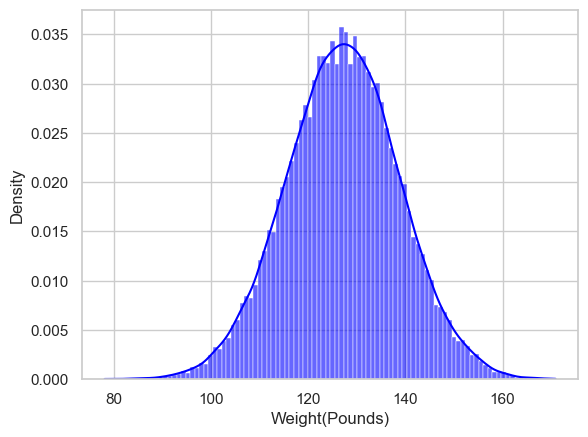

In [102]:
sns.histplot(data['Weight(Pounds)'], bins=100, kde=True, stat='density', color='blue', alpha=0.6)

In [104]:
# Проверяем корреляцию между ростом и весом
correlation = data['Weight(Pounds)'].corr(data['Height(Inches)'])
print("Коэффициент корреляции между весом и ростом:", correlation)

Коэффициент корреляции между весом и ростом: 0.5028585206028434


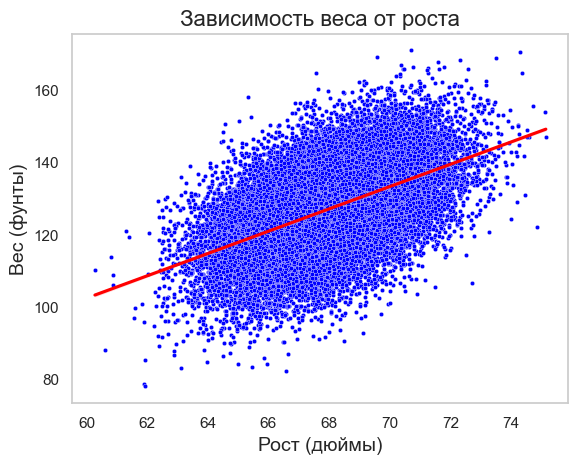

In [109]:
sns.scatterplot(x='Height(Inches)', y='Weight(Pounds)', data=data, color='blue', s=10)

# Подгоняем линию регрессии
sns.regplot(x='Height(Inches)', y='Weight(Pounds)', data=data, scatter=False, color='red')

# Заголовки и подписи
plt.title('Зависимость веса от роста', fontsize=16)
plt.xlabel('Рост (дюймы)', fontsize=14)
plt.ylabel('Вес (фунты)', fontsize=14)
plt.grid()
plt.show()

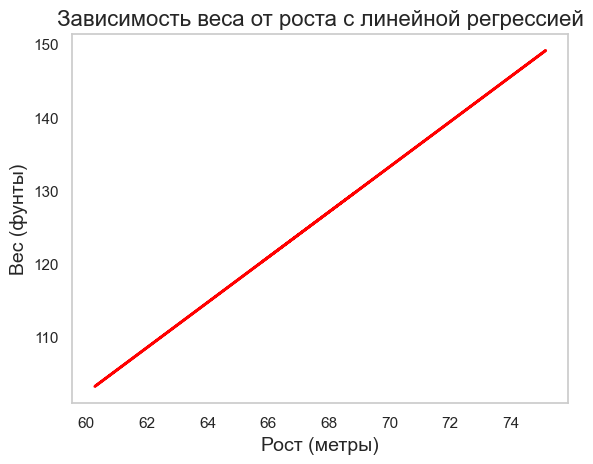

In [115]:
# Подгоняем линейную регрессию
X = data[['Height(Inches)']]  # Признак (независимая переменная)
y = data['Weight(Pounds)']    # Целевая переменная

# Создаем модель линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Предсказываем значения
predictions = model.predict(X)

# Наносим линию регрессии
plt.plot(data['Height(Inches)'], predictions, color='red', linewidth=2)

# Заголовки и подписи
plt.title('Зависимость веса от роста с линейной регрессией', fontsize=16)
plt.xlabel('Рост (дюймы)', fontsize=14)
plt.ylabel('Вес (фунты)', fontsize=14)
plt.grid()
plt.show()

In [119]:
df_sample = data.sample(n=5000, random_state=1)
p = scipy.stats.shapiro(df_sample['Height(Inches)']) # проведем тест Шапиро-Уилка на нормальность распределения
p

ShapiroResult(statistic=np.float64(0.9995618661877756), pvalue=np.float64(0.3263175524219949))

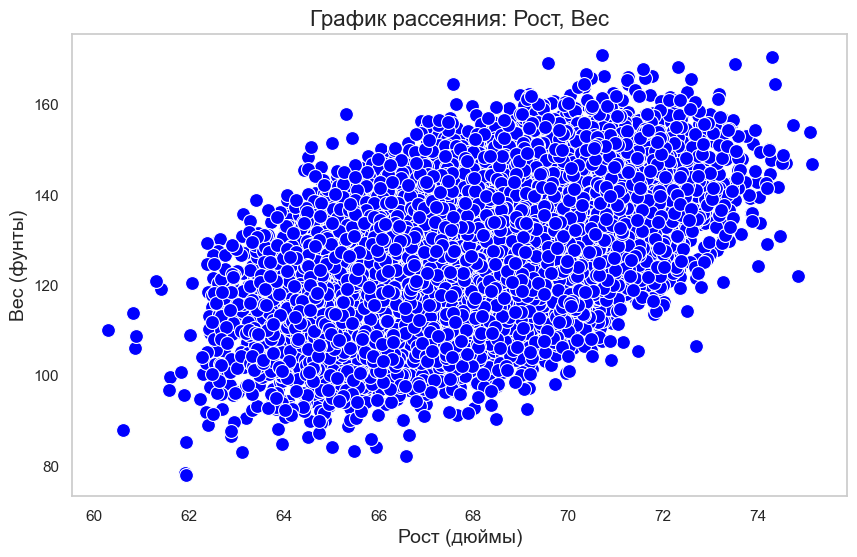

In [128]:
# Визуализация графика рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height(Inches)', y='Weight(Pounds)', data=data, color='blue', s=100)
plt.title('График рассеяния: Рост, Вес', fontsize=16)
plt.xlabel('Рост (дюймы)', fontsize=14)
plt.ylabel('Вес (фунты)', fontsize=14)
plt.grid()
plt.show()

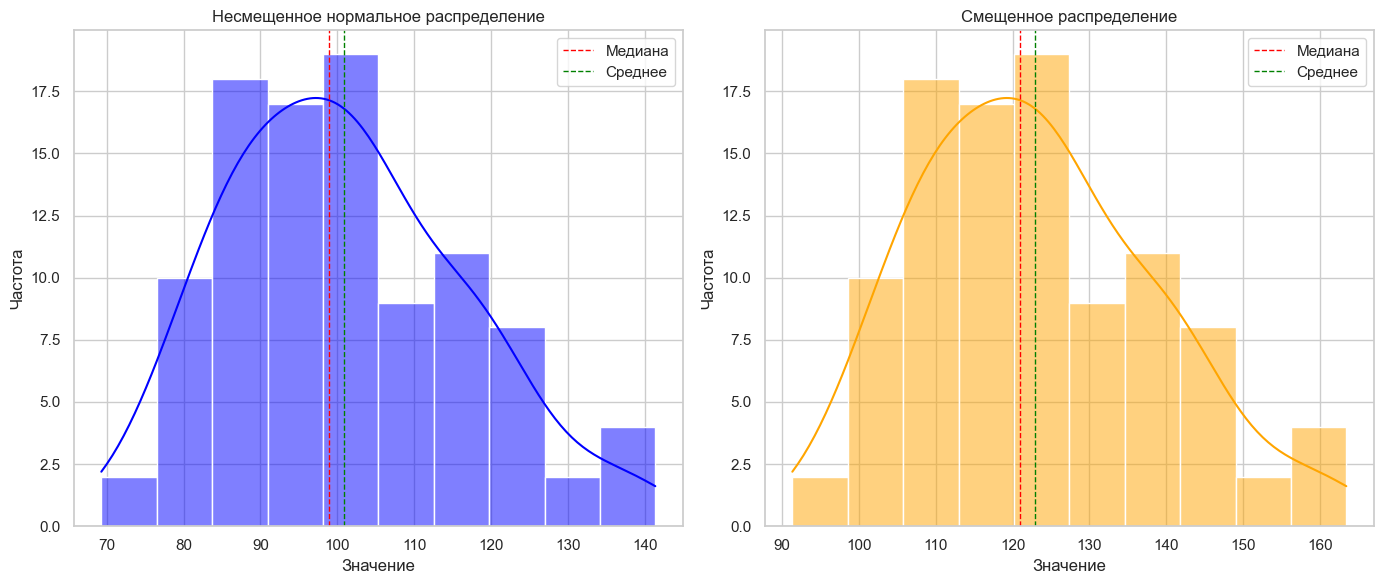

Несмещенное распределение: Медиана = 98.87895279301381, Среднее = 100.86052681745967
Смещенное распределение: Медиана = 120.92574896115048, Среднее = 122.90732298559632


In [175]:
def generate_normal_distribution(mean, std_dev, size):
    """
    Генерирует нормально распределенные данные.

    :param mean: Среднее значение.
    :param std_dev: Стандартное отклонение.
    :param size: Количество сгенерированных значений.
    :return: Нормально распределенные данные.
    """
    return np.random.normal(loc=mean, scale=std_dev, size=size)

def create_skewed_distribution(data, shift_percent):
    """
    Создает смещенное распределение, добавляя фиксированное значение.

    :param data: Исходные данные.
    :param shift_percent: Процент от размаха для смещения.
    :return: Смещенные данные.
    """
    mean = np.mean(data)
    std_dev = np.std(data)
    shift_value = shift_percent * (mean + 3 * std_dev)  # Смещение на заданный процент размаха
    return data + shift_value

def plot_distributions(normal_data, skewed_data):
    """
    Визуализирует нормально распределенные и смещенные данные.

    :param normal_data: Нормально распределенные данные.
    :param skewed_data: Смещенные данные.
    """
    plt.figure(figsize=(14, 6))

    # График несмещенного распределения
    plt.subplot(1, 2, 1)
    sns.histplot(normal_data, bins=10, kde=True, color='blue')
    plt.axvline(np.median(normal_data), color='red', linestyle='dashed', linewidth=1, label='Медиана')
    plt.axvline(np.mean(normal_data), color='green', linestyle='dashed', linewidth=1, label='Среднее')
    plt.title('Несмещенное нормальное распределение')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()

    # График смещенного распределения
    plt.subplot(1, 2, 2)
    sns.histplot(skewed_data, bins=10, kde=True, color='orange')
    plt.axvline(np.median(skewed_data), color='red', linestyle='dashed', linewidth=1, label='Медиана')
    plt.axvline(np.mean(skewed_data), color='green', linestyle='dashed', linewidth=1, label='Среднее')
    plt.title('Смещенное распределение')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()

    plt.tight_layout()
    plt.show()

def generate_distributions(mean=100, std_dev=15, size=100, shift_percent=0.15):
    """
    Генерирует нормально распределенные данные и смещенные данные,
    затем визуализирует их.

    :param mean: Среднее значение для нормального распределения.
    :param std_dev: Стандартное отклонение для нормального распределения.
    :param size: Количество сгенерированных значений.
    :param shift_percent: Процент от размаха для смещения медианы.
    """
    # Генерация нормально распределенных данных
    normal_data = generate_normal_distribution(mean, std_dev, size)

    # Создание смещенного распределения
    skewed_data = create_skewed_distribution(normal_data, shift_percent)

    # Визуализация распределений
    plot_distributions(normal_data, skewed_data)

    # Вывод медианы и среднего
    print(f"Несмещенное распределение: Медиана = {np.median(normal_data)}, Среднее = {np.mean(normal_data)}")
    print(f"Смещенное распределение: Медиана = {np.median(skewed_data)}, Среднее = {np.mean(skewed_data)}")


generate_distributions()


# Равномерное распределение

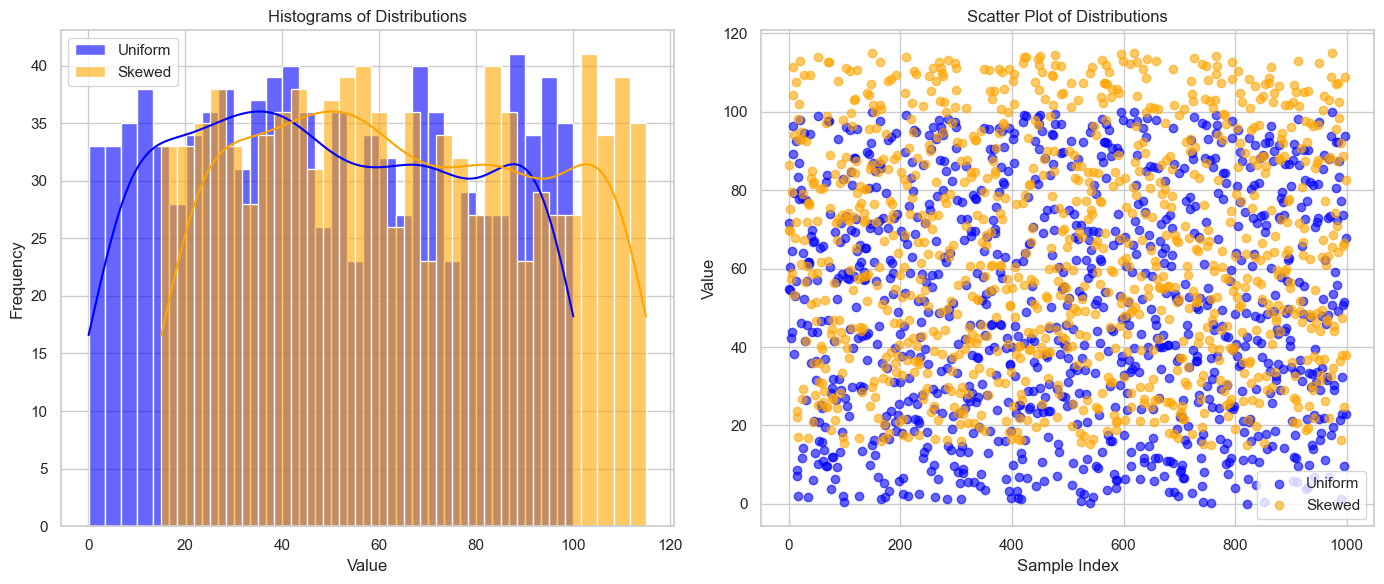

Uniform Distribution: Mean = 49.592153437178276, Median = 48.13225647664284, Mode = 0.05459648969956543
Skewed Distribution: Mean = 64.58109263547783, Median = 63.121195674942385, Mode = 15.04353568799911
Results saved to: distribution_analysis.xlsx


In [210]:
def analyze_distributions(n_samples=1000, low=0, high=100, offset_fraction=0.15):

    np.random.seed(0)

    uniform_distribution = np.random.uniform(low=low, high=high, size=n_samples)

    range_uniform = uniform_distribution.max() - uniform_distribution.min()
    offset = offset_fraction * range_uniform
    skewed_distribution = uniform_distribution + offset

    def descriptive_statistics(data):
        mean = np.mean(data)
        median = np.median(data)
        mode = pd.Series(data).mode().values[0]  # Находим моду
        return mean, median, mode

    stats_uniform = descriptive_statistics(uniform_distribution)
    stats_skewed = descriptive_statistics(skewed_distribution)

    data = {
        "Uniform Distribution": uniform_distribution,
        "Skewed Distribution": skewed_distribution
    }
    df = pd.DataFrame(data)

    excel_file_path = 'distribution_analysis.xlsx'
    df.to_excel(excel_file_path, index=False)

    plt.figure(figsize=(14, 6))

    # Гистограммы
    plt.subplot(1, 2, 1)
    sns.histplot(uniform_distribution, bins=30, kde=True, color='blue', alpha=0.6, label='Uniform')
    sns.histplot(skewed_distribution, bins=30, kde=True, color='orange', alpha=0.6, label='Skewed')
    plt.title('Histograms of Distributions')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    # График рассеивания
    plt.subplot(1, 2, 2)
    plt.scatter(range(n_samples), uniform_distribution, color='blue', alpha=0.6, label='Uniform')
    plt.scatter(range(n_samples), skewed_distribution, color='orange', alpha=0.6, label='Skewed')
    plt.title('Scatter Plot of Distributions')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Вывод описательных характеристик
    print("Uniform Distribution: Mean = {}, Median = {}, Mode = {}".format(*stats_uniform))
    print("Skewed Distribution: Mean = {}, Median = {}, Mode = {}".format(*stats_skewed))
    print(f"Results saved to: {excel_file_path}")

analyze_distributions()
